# ML Workshop

All code in this file is taken from https://docs.fast.ai/tutorial.vision.html

This workshop aims to provide a fundamental understanding of how ML algorithms work by building a model that can distinguish between dogs and cats.

If you are interested in learning further, check out the course https://course.fast.ai/

Its a free course that provides an extremely solid foundation for you to start your machine learning career.

## Step 1: Import the necessary functions and classes.

Before you begin, make sure that the colab runtime is set to a GPU. Click on Runtime -> Change Runtime type -> T4 GPU -> Save.

FastAI is an ML library built on top of Pytorch that abstracts away a lot of the low level details and takes care of the mundane tasks on its own.

FastAI still provides low level functionality should we need it.

This allows us to focus on more important tasks while focusing on an ML project.

This line imports everything in the vision module of fastai.

In [17]:
from fastai.vision.all import *

## Step 2: Download the dataset.

FastAI also provides common datasets that you can use for generic tasks. Check https://docs.fast.ai/data.external.html for the list of datasets.

Usually you'll have to find or create your own datasets for projects that need to do a specific task through machine learning.

We download the Pets dataset that they provide.

In [18]:
path = untar_data(URLs.PETS)

In [19]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [20]:
files = get_image_files(path/"images")
len(files)

7390

Each dataset consists of two important things:
1. The data itself
2. The labels

Labels tell us what the data is. In this case, the labels would be "Dog" and "Cat"

Machine learning models cannot tell what an image has. Through labels, we can get the model to understand what an image is. In this case, we'll train a model to learn if an image is of a dog or of a cat.

This method of machine learning, which involves clearly labelled data, is called supervised learning.

In the Pets dataset, the images are labelled through the file name. If the first letter of the filename is uppercase, its a cat image, otherwise its a dog image.

In [21]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_150.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_115.jpg'))

This function allows us to identify labels by checking the case of the first letter.

It returns true if its uppercase. false if its lowercase.

We have set a convention for this project that a true value corresponds to a cat picture and a false value corresponds to a dog picture.

In [22]:
def label_func(f): return f[0].isupper()

## Step 3: Prepare the data for training and testing.

Before we train the model itself, we have to make sure that all the data is consistent and there aren't any outliers that can cause trouble in training.

Different types of data have different adjustments that have to be made. Different machine learning models also have different requirements.

In our case, we make sure that all the images are of size 224 by 224.

Data also has to be passed to the model in batches of n images to train it well.

DataLoaders take care of these details for us.


In [23]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

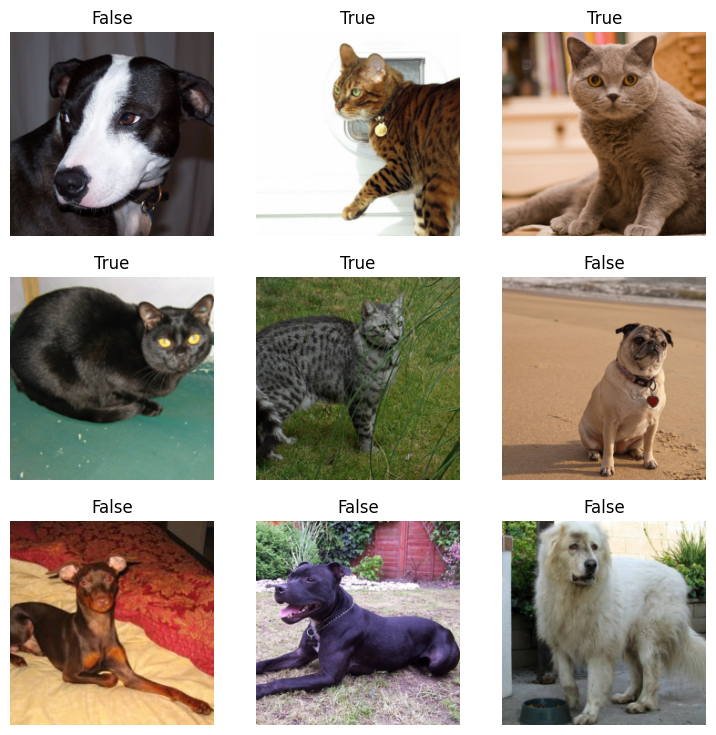

In [24]:
dls.show_batch()

## Step 4: Create a model and train it

Now that the data has been prepared, we have to create an actual model.

We'll be building a convolutional neural network because it is good at dealing with images.

We'll be using a technique called Transfer learning.

Researchers and many talented practitioners have built good generic models that are good at identifying images (in our case).

But they still require fine tuning to work properly for a particular usecase.

In transfer learning, we make use of model architectures, that are proven to work, and fine tune them with our particular data.

It is possible to build a model from scratch, but there is no need to rebuild the wheel. Chances are its not going to be as accurate as other tested architectures and opens room for more error.

We use an architecture called resnet34, and fine tune it with our data.

In [25]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.151225,0.015261,0.004736,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.039592,0.013151,0.004060,00:48


You can notice that with each epoch the training loss, the validation loss, and the error rate decreases. This means that the model learns about the image and makes less mistakes.

Make a prediction on the first image.

When making predictions, the model tries to identify the image. The label isn't passed to the model.

In [11]:
learn.predict(files[0])

('False', tensor(0), tensor([9.9999e-01, 1.0312e-05]))

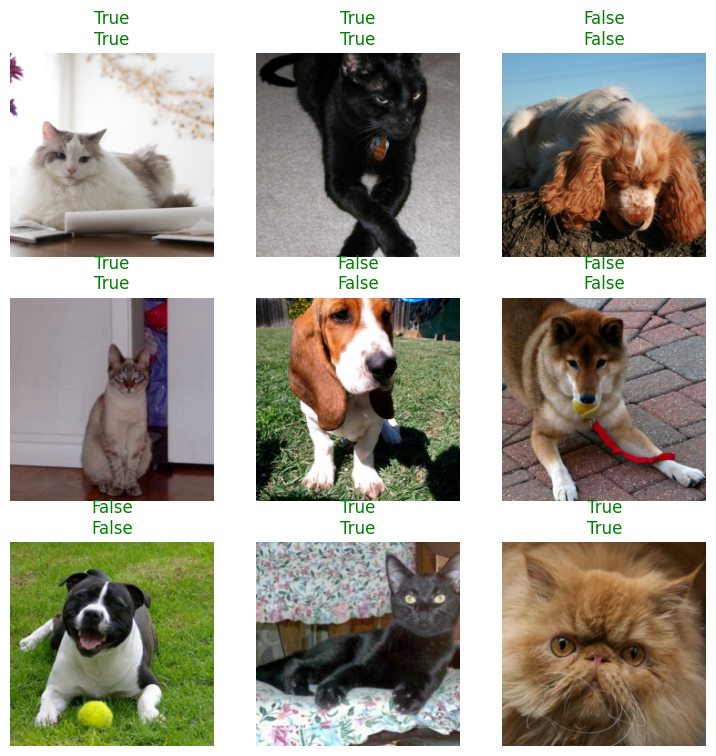

In [26]:
learn.show_results()

Let us look at what happens when we don't fine tune the model.

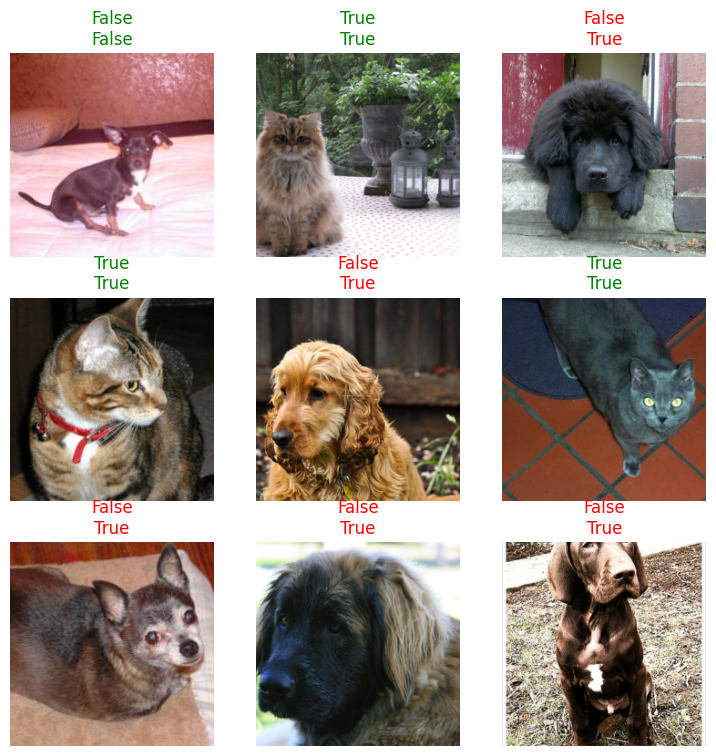

In [28]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

learn.show_results()

# That's it! You have successfully created a model that can distinguish between cats and dogs.

Now you should be able to understand how the general machine learning workflow goes.

The same flow applies to all kinds of machine learning models and techniques.

You can start delving a little deeper and learning more low level details involved in machine learning.